In [ ]:
import pandas as pd
import re
import ast
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1M Data

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/BOAZ_미니프로젝트1/Code정리/ml-1m/ratings.dat', sep="::", header=None, engine="python")
df_data.columns=['사용자ID', '영화ID', '평점', '타임스탬프']
print(df_data.shape)
df_data.head()

(1000209, 4)


,사용자ID,영화ID,평점,타임스탬프
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Boaz/mini_project1/ml-1m/ratings.dat', sep="::", header=None, engine="python")
df_data.columns=['사용자ID', '영화ID', '평점', '타임스탬프']
print(df_data.shape)
df_data.head()

(1000209, 4)


,사용자ID,영화ID,평점,타임스탬프
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
# 컬럼명 리스트 정의
column_names = ["영화ID", "영화제목", "장르"]

# 파일 불러오기 (구분자는 '::', 헤더 없음)
df_item = pd.read_csv('/content/drive/MyDrive/Boaz/mini_project1/ml-1m/movies.dat',
                      sep="::", names=column_names, engine="python",  encoding="ISO-8859-1")

# 영화 제목에서 연도 제거 (예: "Toy Story (1995)" → "Toy Story")
df_item['영화제목'] = df_item['영화제목'].apply(lambda x: re.sub(r'\s*\(\d{4}\)', '', x))

# 장르 컬럼을 리스트로 변환 ( | 로 구분된 장르를 리스트로 변환)
df_item["장르"] = df_item["장르"].apply(lambda x: x.split("|"))

# 데이터 확인
print(df_item.shape)  # 데이터 크기 출력
df_item.head()

(3883, 3)


,영화ID,영화제목,장르
0,1,Toy Story,"[Animation, Children's, Comedy]"
1,2,Jumanji,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men,"[Comedy, Romance]"
3,4,Waiting to Exhale,"[Comedy, Drama]"
4,5,Father of the Bride Part II,[Comedy]


- 연령 및 직업은 라벨인코딩 된 상태, README에 설명있음

In [ ]:
df_user = pd.read_csv('/content/drive/MyDrive/Boaz/mini_project1/ml-1m/users.dat', sep="::", header=None, encoding="ISO-8859-1")

# 컬럼 이름 지정
df_user.columns = ['사용자ID', '성별', '나이', '직업', '우편번호']

# 데이터 확인
print(df_user.shape)  # 데이터 크기 출력
df_user.head()

<ipython-input-5-8644a4043369>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_user = pd.read_csv('/content/drive/MyDrive/Boaz/mini_project1/ml-1m/users.dat', sep="::", header=None, encoding="ISO-8859-1")


(6040, 5)


,사용자ID,성별,나이,직업,우편번호
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
df_data.sort_values(by='영화ID')

,사용자ID,영화ID,평점,타임스탬프
427702,2599,1,4,973796689
1966,18,1,4,978154768
683688,4089,1,5,965428947
596207,3626,1,4,966594018
465902,2873,1,5,972784317
...,...,...,...,...
84701,551,3952,4,976067330
253845,1544,3952,4,974742620
180689,1130,3952,3,975593522
35180,238,3952,4,976760112


In [ ]:
m1 = pd.merge(df_data, df_item, on='영화ID', how='inner') # 사용자-영화 평점 데이터에 영화 정보 결합
m2 = pd.merge(m1, df_user, on='사용자ID', how='inner')    # m1에 사용자 정보 결합
m2.columns

Index(['사용자ID', '영화ID', '평점', '타임스탬프', '영화제목', '장르', '성별', '나이', '직업', '우편번호'], dtype='object')

In [ ]:
# 우편번호 제외
df_1M = m2[['사용자ID', '평점', '나이','성별', '직업', '영화ID', '영화제목', '장르', '타임스탬프']]
print(df_1M.shape)

# 1M data 최종
df_1M.head()

(1000209, 9)


,사용자ID,평점,나이,성별,직업,영화ID,영화제목,장르,타임스탬프
0,1,5,1,F,10,1193,One Flew Over the Cuckoo's Nest,[Drama],978300760
1,1,3,1,F,10,661,James and the Giant Peach,"[Animation, Children's, Musical]",978302109
2,1,3,1,F,10,914,My Fair Lady,"[Musical, Romance]",978301968
3,1,4,1,F,10,3408,Erin Brockovich,[Drama],978300275
4,1,5,1,F,10,2355,"Bug's Life, A","[Animation, Children's, Comedy]",978824291


In [ ]:
# 영화제목 > title로 칼럼명 변경
df_1M = df_1M.rename(columns={"영화제목": "title"})

# 1M data 최종
df_1M.head()

,사용자ID,평점,나이,성별,직업,영화ID,title,장르,타임스탬프
0,1,5,1,F,10,1193,One Flew Over the Cuckoo's Nest,[Drama],978300760
1,1,3,1,F,10,661,James and the Giant Peach,"[Animation, Children's, Musical]",978302109
2,1,3,1,F,10,914,My Fair Lady,"[Musical, Romance]",978301968
3,1,4,1,F,10,3408,Erin Brockovich,[Drama],978300275
4,1,5,1,F,10,2355,"Bug's Life, A","[Animation, Children's, Comedy]",978824291


In [ ]:
# 사용자ID의 unique 개수
num_unique_users = df_1M['사용자ID'].nunique()

# 영화ID의 unique 개수
num_unique_movies = df_1M['영화ID'].nunique()

print(f"고유한 사용자 수: {num_unique_users}")
print(f"고유한 영화 수: {num_unique_movies}")
print(f"전체 평점 개수: {len(df_1M)}")

고유한 사용자 수: 6040
고유한 영화 수: 3706
전체 평점 개수: 1000209


### The movie data - kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

100%|██████████| 228M/228M [00:01<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7


In [ ]:
ratings_path = f"{path}/ratings.csv"
ratings_df = pd.read_csv(ratings_path)
print(ratings_df.shape)
ratings_df.head()        # 총26,024,289개의 평점

(26024289, 4)


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
ratings_df.groupby('userId').count()   # 총 270,896명의 사용자

,movieId,rating,timestamp
userId,,,
1,27,27,27
2,22,22,22
3,10,10,10
4,62,62,62
5,26,26,26
...,...,...,...
270892,75,75,75
270893,190,190,190
270894,148,148,148


In [ ]:
movies_path = f"{path}/movies_metadata.csv"
movies_df = pd.read_csv(movies_path,low_memory=False)
movies_df['movieId']=movies_df['id']      # ratings_df와 동일한 칼럼명으로 변경
movies_df.drop('id',axis=1,inplace=True)  # 기존 id 삭제

In [ ]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId'],
      dtype='object')

In [ ]:
# nan 값이 많은 belongs_to_collection, homepage, tagline 열 drop
# imdb_id도 필요 없음
movies_df.drop(['belongs_to_collection','homepage','tagline','imdb_id'],axis=1,inplace=True)

In [ ]:
# 결측치가 하나라도 있는 행 드랍
movies_df.dropna(axis=0,inplace=True, subset=movies_df.columns[movies_df.isna().sum()>0].tolist())

In [ ]:
movies_df['movieId']=movies_df['movieId'].astype('int')
df_movie=pd.merge(ratings_df,movies_df,on='movieId',how='inner')

In [ ]:
df_movie.head()

,userId,movieId,rating,timestamp,adult,budget,genres,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,1,110,1.0,1425941529,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",fr,Trois couleurs : Rouge,Red This is the third film from the trilogy by...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0
1,1,147,4.5,1425942435,False,0,"[{'id': 18, 'name': 'Drama'}]",fr,Les Quatre Cents Coups,"For young Parisian boy Antoine Doinel, life is...",...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1959-05-04,0.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The 400 Blows,False,8.0,363.0
2,1,858,5.0,1425941523,False,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Sleepless in Seattle,A young boy who tries to set his dad up on a d...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1993-06-24,227799884.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sleepless in Seattle,False,6.5,630.0
3,1,1246,5.0,1425941556,False,24000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky Balboa,When he loses a highly publicized virtual boxi...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-12-20,155721132.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Rocky Balboa,False,6.5,858.0
4,1,1968,4.0,1425942148,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",en,Fools Rush In,Alex Whitman (Matthew Perry) is a designer fro...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1997-02-14,29481428.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fools Rush In,False,5.8,133.0


In [ ]:
# original language, genre, 영화 개봉일, 키워드
df_movie.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'adult', 'budget', 'genres',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df_mov = df_movie[['userId', 'movieId', 'rating', 'adult', 'budget', 'genres',
       'original_language', 'overview', 'release_date', 'title']]
print(df_mov.shape)
df_mov.head()

(11386509, 10)


,userId,movieId,rating,adult,budget,genres,original_language,overview,release_date,title
0,1,110,1.0,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",fr,Red This is the third film from the trilogy by...,1994-05-27,Three Colors: Red
1,1,147,4.5,False,0,"[{'id': 18, 'name': 'Drama'}]",fr,"For young Parisian boy Antoine Doinel, life is...",1959-05-04,The 400 Blows
2,1,858,5.0,False,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,A young boy who tries to set his dad up on a d...,1993-06-24,Sleepless in Seattle
3,1,1246,5.0,False,24000000,"[{'id': 18, 'name': 'Drama'}]",en,When he loses a highly publicized virtual boxi...,2006-12-20,Rocky Balboa
4,1,1968,4.0,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",en,Alex Whitman (Matthew Perry) is a designer fro...,1997-02-14,Fools Rush In


In [ ]:
df_keyword = pd.read_csv(f'{path}/keywords.csv')
df_keyword['keywords'] = df_keyword['keywords'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if isinstance(x, str) else [])
df_keyword.head()

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


In [ ]:
# 키워드를 문자열로 변환
df_keyword['keywords_text'] = df_keyword['keywords'].apply(lambda x: ', '.join(x) if x else "")
df_key = df_keyword[['id', 'keywords_text']]

In [ ]:
df_key.columns = ['movieId', 'keywords']

In [ ]:
df_movie = pd.merge(df_mov, df_key, on='movieId', how='inner')
print(df_movie.shape)
df_movie.head()

(11393822, 11)


,userId,movieId,rating,adult,budget,genres,original_language,overview,release_date,title,keywords
0,1,110,1.0,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",fr,Red This is the third film from the trilogy by...,1994-05-27,Three Colors: Red,"judge, isolation, mannequin, shadowing, englis..."
1,1,147,4.5,False,0,"[{'id': 18, 'name': 'Drama'}]",fr,"For young Parisian boy Antoine Doinel, life is...",1959-05-04,The 400 Blows,"fondling, independent film, nouvelle vague, sk..."
2,1,858,5.0,False,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,A young boy who tries to set his dad up on a d...,1993-06-24,Sleepless in Seattle,"father son relationship, lovesickness, journal..."
3,1,1246,5.0,False,24000000,"[{'id': 18, 'name': 'Drama'}]",en,When he loses a highly publicized virtual boxi...,2006-12-20,Rocky Balboa,"philadelphia, transporter, fight, love of one'..."
4,1,1968,4.0,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",en,Alex Whitman (Matthew Perry) is a designer fro...,1997-02-14,Fools Rush In,"waitress, culture clash, romantic comedy, preg..."


In [ ]:
df_movv = df_movie[['title', 'genres', 'release_date','original_language', 'overview', 'keywords']]
df_movv['title'].value_counts()

,count
title,
The Million Dollar Hotel,91082
Terminator 3: Rise of the Machines,87901
Solaris,84318
The 39 Steps,77045
Monsoon Wedding,74355
...,...
The House of Smiles,1
The Intern,1
"Be Silent, Sorrow, Be Silent",1


In [ ]:
# 'title' 값에 대해 나머지 컬럼들이 모두 동일한 경우의 중복 여부를 확인
duplicate_rows = df_movv.groupby('title').apply(lambda x: x.nunique(axis=0).eq(1).all()).reset_index(name='is_duplicate')

# 'is_duplicate'가 True인 경우, 모든 컬럼 값이 중복되는 것을 의미
duplicate_rows = duplicate_rows[duplicate_rows['is_duplicate'] == True]

# 결과 확인
print(duplicate_rows)

                        title  is_duplicate
0       !Women Art Revolution          True
1         $1,000 on the Black          True
2                    $5 a Day          True
3                 'Gator Bait          True
4                     'R Xmas          True
...                       ...           ...
7248        Åke and His World          True
7249                 Æon Flux          True
7250                 Ödipussi          True
7251         Şaban Oğlu Şaban          True
7252  Šíleně smutná princezna          True

[7112 rows x 2 columns]


<ipython-input-28-f4b59ef8c20b>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicate_rows = df_movv.groupby('title').apply(lambda x: x.nunique(axis=0).eq(1).all()).reset_index(name='is_duplicate')


In [ ]:
duplicate_rows['is_duplicate'].value_counts()  # 전부 다 동일한 정보를 지님 -> 각 영화 당 1row만 남기고 drop

,count
is_duplicate,
True,7112


In [ ]:
# 각 영화(title)별로 중복된 행을 제거하고, 각 영화당 1개의 행만 남기기
df_mov_info = df_movv.drop_duplicates(subset='title', keep='first').reset_index().drop(columns ='index')
df_mov_info

,title,genres,release_date,original_language,overview,keywords
0,Three Colors: Red,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",1994-05-27,fr,Red This is the third film from the trilogy by...,"judge, isolation, mannequin, shadowing, englis..."
1,The 400 Blows,"[{'id': 18, 'name': 'Drama'}]",1959-05-04,fr,"For young Parisian boy Antoine Doinel, life is...","fondling, independent film, nouvelle vague, sk..."
2,Sleepless in Seattle,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1993-06-24,en,A young boy who tries to set his dad up on a d...,"father son relationship, lovesickness, journal..."
3,Rocky Balboa,"[{'id': 18, 'name': 'Drama'}]",2006-12-20,en,When he loses a highly publicized virtual boxi...,"philadelphia, transporter, fight, love of one'..."
4,Fools Rush In,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",1997-02-14,en,Alex Whitman (Matthew Perry) is a designer fro...,"waitress, culture clash, romantic comedy, preg..."
...,...,...,...,...,...,...
7248,The Comedian,[],2013-05-31,en,Set in the immediate and random background of ...,
7249,Love and Honor,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2013-03-22,en,When a young soldier in Vietnam gets dumped by...,"vietnam war, u.s. soldier, anti war, awol, win..."
7250,Trapped in the Closet: Chapters 23-33,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2012-11-23,en,"The long awaited sequel to R. Kelly's ""Trapped...",
7251,The Rambler,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2013-01-21,en,"After being released from prison, a man known ...",


### df_1M + df_movie

In [ ]:
merged = pd.merge(df_1M, df_mov_info, on='title', how='inner')
print(merged.shape)
merged.head()

(401290, 14)


,사용자ID,평점,나이,성별,직업,영화ID,title,장르,타임스탬프,genres,release_date,original_language,overview,keywords
0,1,5,1,F,10,1193,One Flew Over the Cuckoo's Nest,[Drama],978300760,"[{'id': 18, 'name': 'Drama'}]",1975-11-18,en,While serving time for insanity at a state men...,"individual, rebel, self-destruction, wheelchai..."
1,1,4,1,F,10,3408,Erin Brockovich,[Drama],978300275,"[{'id': 18, 'name': 'Drama'}]",2000-03-17,en,A twice-divorced mother of three who sees an i...,"biography, based on true story, single mother,..."
2,1,5,1,F,10,1287,Ben-Hur,"[Action, Adventure, Drama]",978302039,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1959-12-26,en,Ben-Hur is a 1959 epic film directed by Willia...,"roman, prince, chariot race, jerusalem, govern..."
3,1,4,1,F,10,594,Snow White and the Seven Dwarfs,"[Animation, Children's, Musical]",978302268,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",1937-12-20,en,"A beautiful girl, Snow White, takes refuge in ...","poison, witch, becoming an adult, sadness, que..."
4,1,5,1,F,10,595,Beauty and the Beast,"[Animation, Children's, Musical]",978824268,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",1946-10-29,fr,The story of a gentle-hearted beast in love wi...,"underdog, monster, beauty, rose, daughter"


In [ ]:
merged = merged.drop(columns=['genres'])
print(merged.shape)
merged.head()

(401290, 13)


,사용자ID,평점,나이,성별,직업,영화ID,title,장르,타임스탬프,release_date,original_language,overview,keywords
0,1,5,1,F,10,1193,One Flew Over the Cuckoo's Nest,[Drama],978300760,1975-11-18,en,While serving time for insanity at a state men...,"individual, rebel, self-destruction, wheelchai..."
1,1,4,1,F,10,3408,Erin Brockovich,[Drama],978300275,2000-03-17,en,A twice-divorced mother of three who sees an i...,"biography, based on true story, single mother,..."
2,1,5,1,F,10,1287,Ben-Hur,"[Action, Adventure, Drama]",978302039,1959-12-26,en,Ben-Hur is a 1959 epic film directed by Willia...,"roman, prince, chariot race, jerusalem, govern..."
3,1,4,1,F,10,594,Snow White and the Seven Dwarfs,"[Animation, Children's, Musical]",978302268,1937-12-20,en,"A beautiful girl, Snow White, takes refuge in ...","poison, witch, becoming an adult, sadness, que..."
4,1,5,1,F,10,595,Beauty and the Beast,"[Animation, Children's, Musical]",978824268,1946-10-29,fr,The story of a gentle-hearted beast in love wi...,"underdog, monster, beauty, rose, daughter"


In [ ]:
merged.isnull().sum()

,0
사용자ID,0
평점,0
나이,0
성별,0
직업,0
영화ID,0
title,0
장르,0
타임스탬프,0
release_date,0


In [ ]:
# 사용자ID의 unique 개수
num_unique_users = merged['사용자ID'].nunique()

# 영화ID의 unique 개수
num_unique_movies = merged['영화ID'].nunique()

print(f"고유한 사용자 수: {num_unique_users}")
print(f"고유한 영화 수: {num_unique_movies}")
print(f"전체 평점 개수: {len(merged)}")

고유한 사용자 수: 6040
고유한 영화 수: 792
전체 평점 개수: 401290


[정리]

1. 기존 전처리 코드로 1M + 캐글 하는 경우  
    *   총 401,290개데이터
    *   고유한 사용자 수 : 6040, 영화수 : 792

2. 어차피 더 큰 데이터셋을 사용할거면 최신 영화가 있는 최근 데이터셋을 쓰고 싶었는데, 1M보다 큰 경우엔 user info가 없음 > 못함




### 추가 전처리 시도

In [ ]:
data = merged.copy()

In [ ]:
data

,사용자ID,평점,나이,성별,직업,영화ID,title,장르,타임스탬프,release_date,original_language,overview,keywords
0,1,5,1,F,10,1193,One Flew Over the Cuckoo's Nest,[Drama],978300760,1975-11-18,en,While serving time for insanity at a state men...,"individual, rebel, self-destruction, wheelchai..."
1,1,4,1,F,10,3408,Erin Brockovich,[Drama],978300275,2000-03-17,en,A twice-divorced mother of three who sees an i...,"biography, based on true story, single mother,..."
2,1,5,1,F,10,1287,Ben-Hur,"[Action, Adventure, Drama]",978302039,1959-12-26,en,Ben-Hur is a 1959 epic film directed by Willia...,"roman, prince, chariot race, jerusalem, govern..."
3,1,4,1,F,10,594,Snow White and the Seven Dwarfs,"[Animation, Children's, Musical]",978302268,1937-12-20,en,"A beautiful girl, Snow White, takes refuge in ...","poison, witch, becoming an adult, sadness, que..."
4,1,5,1,F,10,595,Beauty and the Beast,"[Animation, Children's, Musical]",978824268,1946-10-29,fr,The story of a gentle-hearted beast in love wi...,"underdog, monster, beauty, rose, daughter"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401285,6040,5,25,M,6,2028,Saving Private Ryan,"[Action, Drama, War]",956704519,1998-07-24,en,"As U.S. troops storm the beaches of Normandy, ...","war crimes, self sacrifice, war veteran, world..."
401286,6040,4,25,M,6,1089,Reservoir Dogs,"[Crime, Thriller]",956704996,1992-09-02,en,A botched robbery indicates a police informant...,"traitor, jewelry, psychopath, thief, heist, be..."
401287,6040,3,25,M,6,1090,Platoon,"[Drama, War]",956715518,1986-12-18,en,"As a young and naive recruit in Vietnam, Chris...","famous score, hero, mine, vietnam war, village..."
401288,6040,1,25,M,6,1091,Weekend at Bernie's,[Comedy],956716541,1989-07-05,en,Two friends are invited for a weekend to a lux...,"beach, mission of murder, boss, bad boss, hous..."


In [ ]:
# 사용자별 총 평점 개수 계산
user_rating_counts = data.groupby('사용자ID').size().reset_index(name='평점개수')

print('[사용자 별 평점 개수 상위 10명]')
print(user_rating_counts.sort_values(by='평점개수', ascending=False).head(10))
print('\n[사용자 별 평점 개수 하위  10명]')
print(user_rating_counts.sort_values(by='평점개수', ascending=True).head(10))

[사용자 별 평점 개수 상위 10명]
      사용자ID  평점개수
4168   4169   629
4276   4277   501
1679   1680   494
1180   1181   491
1940   1941   472
888     889   459
3617   3618   434
1014   1015   431
2908   2909   421
423     424   421

[사용자 별 평점 개수 하위  10명]
      사용자ID  평점개수
5145   5146     2
4191   4192     2
3641   3642     3
4060   4061     3
2203   2204     4
5799   5800     4
3837   3838     4
4210   4211     4
4418   4419     5
383     384     5


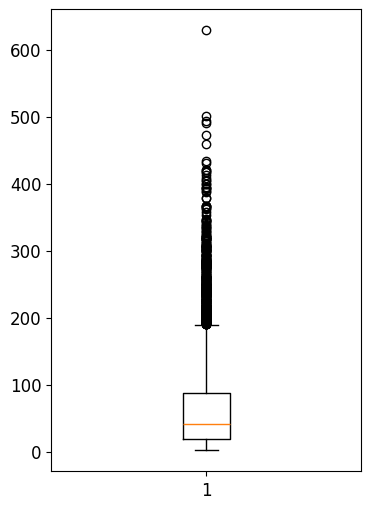

In [ ]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 6)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()
ax.boxplot(user_rating_counts['평점개수'])
plt.show()

In [ ]:
# 구간 설정 (0부터 50 단위로)
bins = list(range(0, max(user_rating_counts['평점개수']) + 50, 50))
labels = [f"{bins[i]}~{bins[i+1]-1}" for i in range(len(bins)-1)]

# 각 구간에 해당하는 개수 계산
count_table = pd.cut(user_rating_counts['평점개수'], bins=bins, right=False, labels=labels)
count_table = count_table.value_counts().sort_index().reset_index()
count_table.columns = ['구간', '명']

# 결과 출력
print(count_table)

         구간     명
0      0~49  3384
1     50~99  1377
2   100~149   608
3   150~199   305
4   200~249   181
5   250~299   100
6   300~349    51
7   350~399    18
8   400~449    10
9   450~499     4
10  500~549     1
11  550~599     0
12  600~649     1


1. 평점 개수 20개 이하인 사용자 삭제

    > **401,290개**에서 **379,370개**로 감소

    > 이것만 적용한게 filtered_data

In [ ]:
sum(user_rating_counts['평점개수'] <=20)

1609

In [ ]:
valid_users = user_rating_counts[user_rating_counts['평점개수'] > 20]['사용자ID']
filtered_data = data[data['사용자ID'].isin(valid_users)]
print(filtered_data.shape)

(379370, 13)


In [ ]:
# 다시 사용자별 총 평점 개수 계산
filtered_rating_counts = filtered_data.groupby('사용자ID').size().reset_index(name='평점개수')
filtered_rating_counts

,사용자ID,평점개수
0,1,29
1,2,59
2,5,60
3,6,32
4,8,61
...,...,...
4426,6035,108
4427,6036,284
4428,6037,98
4429,6039,58


2. 구간에 따라 언더샘플링
*  200~299 구간: 각 사용자 평점의 20% 삭제
*  300~399 구간: 각 사용자 평점의 30% 삭제
*  400 이상 구간: 각 사용자 평점의 40% 삭제

    > **379,370개**에서 **356,631개**로 감소

    > 1 + 2 적용한게 filtered_data2

In [ ]:
import numpy as np

In [ ]:
# 삭제할 비율 설정
remove_ratio = {
    "200~299": 0.2,  # 20% 삭제
    "300~399": 0.3,    # 30% 삭제,
    "400~": 0.4    # 40% 삭제
}

# 200~299 구간에 해당하는 사용자 ID 추출
review_users_200 = filtered_rating_counts[
    (filtered_rating_counts['평점개수'] >= 200) & (filtered_rating_counts['평점개수'] < 299)
]['사용자ID'].tolist()

# 300~399 구간에 해당하는 사용자 ID 추출
review_users_300 = filtered_rating_counts[
    (filtered_rating_counts['평점개수'] >= 300) & (filtered_rating_counts['평점개수'] < 399)
]['사용자ID'].tolist()

# 400 이상 구간에 해당하는 사용자 ID 추출
review_users_400 = filtered_rating_counts[filtered_rating_counts['평점개수'] >= 400]['사용자ID'].tolist()

# 각 사용자별 리뷰를 개별적으로 일정 비율 삭제하는 함수
def delete_reviews_per_user(user_ids, ratio, df):
    for user in user_ids:
        user_reviews = df[df['사용자ID'] == user]  # 특정 사용자의 리뷰만 가져오기
        delete_count = int(len(user_reviews) * ratio)  # 삭제할 리뷰 개수 계산

        if delete_count > 0:
            # 해당 사용자의 리뷰 중 일부 샘플링해서 삭제
            to_delete = user_reviews.sample(n=delete_count, random_state=42)
            df = df.drop(to_delete.index)  # 삭제된 리뷰 제거

    return df

# 원본 데이터에서 각 사용자별 리뷰 삭제 적용
filtered_data2 = delete_reviews_per_user(review_users_200, remove_ratio["200~299"], filtered_data)
filtered_data2 = delete_reviews_per_user(review_users_300, remove_ratio["300~399"], filtered_data2)
filtered_data2 = delete_reviews_per_user(review_users_400, remove_ratio["400~"], filtered_data2)

# 결과 확인
print(f"최종 데이터 크기: {len(filtered_data2)}")

최종 데이터 크기: 356631


In [ ]:
# 제대로 됐는지 확인
filtered_rating_counts2 = filtered_data2.groupby('사용자ID').size().reset_index(name='평점개수')

print('[사용자 별 평점 개수 상위 10명]')
print(filtered_rating_counts2.sort_values(by='평점개수', ascending=False).head(10))

[사용자 별 평점 개수 상위 10명]
      사용자ID  평점개수
408     549   399
1082   1449   399
3067   4169   378
3142   4277   301
776    1051   299
3408   4647   299
831    1117   299
1233   1680   297
884    1181   295
1419   1941   284


데이터프레임 저장

In [ ]:
print(filtered_data2.shape)
filtered_data2.head()

(356631, 13)


,사용자ID,평점,나이,성별,직업,영화ID,title,장르,타임스탬프,release_date,original_language,overview,keywords
0,1,5,1,F,10,1193,One Flew Over the Cuckoo's Nest,[Drama],978300760,1975-11-18,en,While serving time for insanity at a state men...,"individual, rebel, self-destruction, wheelchai..."
1,1,4,1,F,10,3408,Erin Brockovich,[Drama],978300275,2000-03-17,en,A twice-divorced mother of three who sees an i...,"biography, based on true story, single mother,..."
2,1,5,1,F,10,1287,Ben-Hur,"[Action, Adventure, Drama]",978302039,1959-12-26,en,Ben-Hur is a 1959 epic film directed by Willia...,"roman, prince, chariot race, jerusalem, govern..."
3,1,4,1,F,10,594,Snow White and the Seven Dwarfs,"[Animation, Children's, Musical]",978302268,1937-12-20,en,"A beautiful girl, Snow White, takes refuge in ...","poison, witch, becoming an adult, sadness, que..."
4,1,5,1,F,10,595,Beauty and the Beast,"[Animation, Children's, Musical]",978824268,1946-10-29,fr,The story of a gentle-hearted beast in love wi...,"underdog, monster, beauty, rose, daughter"


In [ ]:
filtered_data2.isnull().sum()

,0
사용자ID,0
평점,0
나이,0
성별,0
직업,0
영화ID,0
title,0
장르,0
타임스탬프,0
release_date,0


In [ ]:
# 사용자ID의 unique 개수
num_unique_users = filtered_data2['사용자ID'].nunique()

# 영화ID의 unique 개수
num_unique_movies = filtered_data2['영화ID'].nunique()

print(f"고유한 사용자 수: {num_unique_users}")
print(f"고유한 영화 수: {num_unique_movies}")
print(f"전체 평점 개수: {len(filtered_data2)}")

고유한 사용자 수: 4431
고유한 영화 수: 789
전체 평점 개수: 356631


In [ ]:
filtered_data2.to_csv('1M_movie_data.csv')

In [ ]:
dff= pd.read_csv('/content/drive/MyDrive/BOAZ/1M_movie_data.csv').head()
print(dff.shape)
dff.head()

(5, 14)


,Unnamed: 0,사용자ID,평점,나이,성별,직업,영화ID,title,장르,타임스탬프,release_date,original_language,overview,keywords
0,0,1,5,1,F,10,1193,One Flew Over the Cuckoo's Nest,['Drama'],978300760,1975-11-18,en,While serving time for insanity at a state men...,"individual, rebel, self-destruction, wheelchai..."
1,1,1,4,1,F,10,3408,Erin Brockovich,['Drama'],978300275,2000-03-17,en,A twice-divorced mother of three who sees an i...,"biography, based on true story, single mother,..."
2,2,1,5,1,F,10,1287,Ben-Hur,"['Action', 'Adventure', 'Drama']",978302039,1959-12-26,en,Ben-Hur is a 1959 epic film directed by Willia...,"roman, prince, chariot race, jerusalem, govern..."
3,3,1,4,1,F,10,594,Snow White and the Seven Dwarfs,"['Animation', ""Children's"", 'Musical']",978302268,1937-12-20,en,"A beautiful girl, Snow White, takes refuge in ...","poison, witch, becoming an adult, sadness, que..."
4,4,1,5,1,F,10,595,Beauty and the Beast,"['Animation', ""Children's"", 'Musical']",978824268,1946-10-29,fr,The story of a gentle-hearted beast in love wi...,"underdog, monster, beauty, rose, daughter"
